In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
import pandasql as psql

In [2]:
# reading the file

CFData=pd.read_csv(r"C:\Users\Dlc\54B9\creditcard.csv",header=0)
#copy 20% data (startified split on target variable)

CFData=CFData.groupby("Class" , group_keys=False).apply(lambda x:x.sample(frac=0.03))
# creating a backup file
CFData_bk=CFData.copy()

CFData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
89526,62613.0,1.016188,-1.623491,-0.042939,-1.211156,-0.825063,0.865023,-0.788556,0.214432,-1.899974,1.118361,0.565427,-0.190385,0.397156,-0.217181,0.679025,-2.329874,2.193340,-2.362817,-1.673127,-0.166911,0.029097,0.403616,-0.058311,-0.601334,0.268127,0.026706,0.059460,0.025746,171.80,0
10393,16748.0,-1.547645,1.512650,0.768572,-1.156645,-0.188108,-0.000093,-0.378115,0.971221,0.790887,-1.009715,0.975877,-1.601061,2.549075,1.910508,-0.816241,1.362152,-0.299187,0.800577,-0.065231,0.020352,-0.268995,-0.693153,-0.060330,-0.855081,-0.132645,0.677555,0.095778,0.053652,6.04,0
250059,154703.0,1.975730,-0.092974,-0.744987,0.340163,-0.459412,-0.921032,-0.388361,-0.114735,1.198990,-0.733874,-0.268952,0.585373,0.548306,-1.388936,0.795835,0.524716,0.477956,0.112138,-0.228676,-0.141758,-0.247264,-0.524191,0.366810,-0.130206,-0.499627,-0.282426,0.030251,-0.007790,10.00,0
124616,77360.0,-0.415136,-1.125328,1.438307,-1.433789,-0.409083,-1.129244,0.030834,-0.704157,-2.143228,1.799940,-0.459944,-1.523594,0.216829,-0.660751,0.736598,-1.033315,0.579514,0.204643,0.585975,-0.005711,-0.096850,0.366321,0.033582,0.388629,-0.438633,-0.186629,-0.309173,-0.179469,70.00,0
250776,155058.0,1.572691,-0.963295,-2.295599,0.392600,2.046321,3.862283,-0.495231,0.892908,0.531519,0.131429,-0.197921,0.366197,-0.108020,0.373755,0.649513,0.015625,-0.629022,-0.179948,-0.655255,0.226818,0.164619,0.073143,0.023578,0.686434,-0.038739,-0.657147,0.016303,-0.008908,210.00,0


In [3]:
CFData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8544 entries, 89526 to 150660
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    8544 non-null   float64
 1   V1      8544 non-null   float64
 2   V2      8544 non-null   float64
 3   V3      8544 non-null   float64
 4   V4      8544 non-null   float64
 5   V5      8544 non-null   float64
 6   V6      8544 non-null   float64
 7   V7      8544 non-null   float64
 8   V8      8544 non-null   float64
 9   V9      8544 non-null   float64
 10  V10     8544 non-null   float64
 11  V11     8544 non-null   float64
 12  V12     8544 non-null   float64
 13  V13     8544 non-null   float64
 14  V14     8544 non-null   float64
 15  V15     8544 non-null   float64
 16  V16     8544 non-null   float64
 17  V17     8544 non-null   float64
 18  V18     8544 non-null   float64
 19  V19     8544 non-null   float64
 20  V20     8544 non-null   float64
 21  V21     8544 non-null   float64

In [4]:
CFData.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# identify the duplicate values

CFData_dup=CFData[CFData.duplicated(keep='last')]
CFData_dup

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [6]:
# dropping duplicates

CFData=CFData.drop_duplicates()
CFData

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
89526,62613.0,1.016188,-1.623491,-0.042939,-1.211156,-0.825063,0.865023,-0.788556,0.214432,-1.899974,1.118361,0.565427,-0.190385,0.397156,-0.217181,0.679025,-2.329874,2.193340,-2.362817,-1.673127,-0.166911,0.029097,0.403616,-0.058311,-0.601334,0.268127,0.026706,0.059460,0.025746,171.80,0
10393,16748.0,-1.547645,1.512650,0.768572,-1.156645,-0.188108,-0.000093,-0.378115,0.971221,0.790887,-1.009715,0.975877,-1.601061,2.549075,1.910508,-0.816241,1.362152,-0.299187,0.800577,-0.065231,0.020352,-0.268995,-0.693153,-0.060330,-0.855081,-0.132645,0.677555,0.095778,0.053652,6.04,0
250059,154703.0,1.975730,-0.092974,-0.744987,0.340163,-0.459412,-0.921032,-0.388361,-0.114735,1.198990,-0.733874,-0.268952,0.585373,0.548306,-1.388936,0.795835,0.524716,0.477956,0.112138,-0.228676,-0.141758,-0.247264,-0.524191,0.366810,-0.130206,-0.499627,-0.282426,0.030251,-0.007790,10.00,0
124616,77360.0,-0.415136,-1.125328,1.438307,-1.433789,-0.409083,-1.129244,0.030834,-0.704157,-2.143228,1.799940,-0.459944,-1.523594,0.216829,-0.660751,0.736598,-1.033315,0.579514,0.204643,0.585975,-0.005711,-0.096850,0.366321,0.033582,0.388629,-0.438633,-0.186629,-0.309173,-0.179469,70.00,0
250776,155058.0,1.572691,-0.963295,-2.295599,0.392600,2.046321,3.862283,-0.495231,0.892908,0.531519,0.131429,-0.197921,0.366197,-0.108020,0.373755,0.649513,0.015625,-0.629022,-0.179948,-0.655255,0.226818,0.164619,0.073143,0.023578,0.686434,-0.038739,-0.657147,0.016303,-0.008908,210.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44556,41991.0,-4.566342,3.353451,-4.572028,3.616119,-2.493138,-1.090000,-5.551433,0.447783,-2.424414,-5.699922,3.586824,-6.636229,-1.128176,-7.245550,0.638326,-6.856810,-8.851879,-4.591883,0.936940,-0.249128,2.674466,-0.020880,-0.302447,-0.086396,-0.516060,-0.295102,0.195985,0.141115,1.00,1
64460,51155.0,-11.205461,7.914633,-13.987752,4.333341,-8.484970,-3.506561,-8.935243,7.704449,-2.336584,-5.927359,2.470401,-5.788517,-0.391939,-6.527462,0.899859,-3.847293,-6.700637,-2.492616,0.469554,0.860912,0.942593,-0.987848,-0.279446,-0.027299,0.644344,-0.263078,1.084023,0.211933,99.99,1
154693,102619.0,-2.488363,4.359019,-7.776410,5.364027,-1.823877,-2.445140,-4.964221,1.484890,-2.947899,-7.175350,7.343652,-10.178996,2.142151,-8.983052,-0.473746,-8.143342,-9.785677,-3.086520,3.379713,0.792275,1.325672,1.021226,-0.266476,-0.370880,0.365535,0.081372,0.184983,-0.211582,1.00,1
9252,13323.0,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,-13.136698,11.228470,-17.131301,-0.169401,-18.049998,-1.366236,-9.723565,-14.744902,-5.247301,-0.574675,1.305862,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.00,1


In [7]:
# checking for duplicates

CFData.duplicated().any()

False

In [8]:
#reset index

CFData=CFData.reset_index(drop=True)
CFData_bk2=CFData.copy()

In [9]:
CFData.nunique()

Time      8302
V1        8518
V2        8518
V3        8518
V4        8518
V5        8518
V6        8518
V7        8518
V8        8518
V9        8518
V10       8518
V11       8518
V12       8518
V13       8518
V14       8518
V15       8518
V16       8517
V17       8518
V18       8518
V19       8518
V20       8518
V21       8518
V22       8518
V23       8518
V24       8518
V25       8518
V26       8518
V27       8518
V28       8518
Amount    3832
Class        2
dtype: int64

In [10]:
CFData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8544 entries, 0 to 8543
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    8544 non-null   float64
 1   V1      8544 non-null   float64
 2   V2      8544 non-null   float64
 3   V3      8544 non-null   float64
 4   V4      8544 non-null   float64
 5   V5      8544 non-null   float64
 6   V6      8544 non-null   float64
 7   V7      8544 non-null   float64
 8   V8      8544 non-null   float64
 9   V9      8544 non-null   float64
 10  V10     8544 non-null   float64
 11  V11     8544 non-null   float64
 12  V12     8544 non-null   float64
 13  V13     8544 non-null   float64
 14  V14     8544 non-null   float64
 15  V15     8544 non-null   float64
 16  V16     8544 non-null   float64
 17  V17     8544 non-null   float64
 18  V18     8544 non-null   float64
 19  V19     8544 non-null   float64
 20  V20     8544 non-null   float64
 21  V21     8544 non-null   float64
 22  

In [11]:
CFData['Class'].value_counts()

0    8529
1      15
Name: Class, dtype: int64

In [12]:
#checking whether thedata set is balanced or not
CFData_count=CFData.Class.value_counts()
print('class0:',CFData_count[0])
print('class1:',CFData_count[1])
print('proportion:',round(CFData_count[0]/CFData_count[1],2),':1')
print('total bank records',len(CFData))

class0: 8529
class1: 15
proportion: 568.6 :1
total bank records 8544


In [13]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
CFData.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
cols=['Amount']

In [16]:
IndepVar=[]
for col in CFData.columns:
    if col!='Class':
        IndepVar.append(col)
TargetVar='Class'
x=CFData[IndepVar]

y=CFData[TargetVar]

In [17]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.125)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)



(9595, 30)
(9595,)


In [18]:
#checking whether thedata set is balanced or not
CFData_count=CFData.Class.value_counts()
print('class0:',CFData_count[0])
print('class1:',CFData_count[1])
print('proportion:',round(CFData_count[0]/CFData_count[1],2),':1')
print('total bank records',len(CFData))

class0: 8529
class1: 15
proportion: 568.6 :1
total bank records 8544


In [19]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6716, 30), (2879, 30), (6716,), (2879,))

In [20]:
#scaling the features by using minnmax scaler
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train[cols]=mmscaler.fit_transform(x_train[cols])

x_train=pd.DataFrame(x_train)
x_test[cols]=mmscaler.fit_transform(x_test[cols])

x_test=pd.DataFrame(x_test)


# Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
ModelLR=LogisticRegression()
#modelLR =LogisticRegression (penality='L2',dual=false,tol=0.0001,c=1.0,fit_intercept=True,intercept_scaling=1,
#class_weight=None
ModelLR.fit(x_train,y_train)
#predict the model with the data set
y_pred=ModelLR.predict(x_test)
y_pred_prob=ModelLR.predict_proba(x_test)

confusion matrix [[2553   12]
 [   0  314]]
outcome values 2553 12 0 314
Classification report : 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       0.98      1.00      0.99      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 99.6 %
Precision : 100.0 %
Recall : 99.5 %
F1 Score : 0.998
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.8 %
MCC : 0.979
roc_auc_score: 0.998


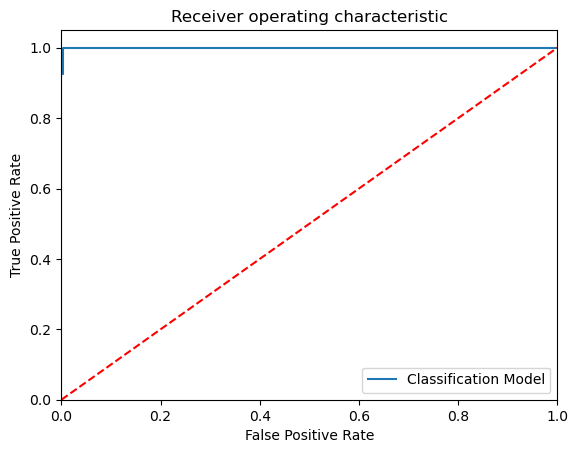

-----------------------------------------------------------------------------------------------------


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual=y_test
# pred values
predicted=y_pred
matrix=confusion_matrix(actual,predicted,labels=[0,1],sample_weight=None,normalize=None)
print('confusion matrix',matrix)

tp,fn,fp,tn=confusion_matrix(actual,predicted,labels=[0,1]).reshape(-1)
print('outcome values',tp,fn,fp,tn)
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelLR.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

# decision tree

confusion matrix [[2565    0]
 [   0  314]]
outcome values 2565 0 0 314
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


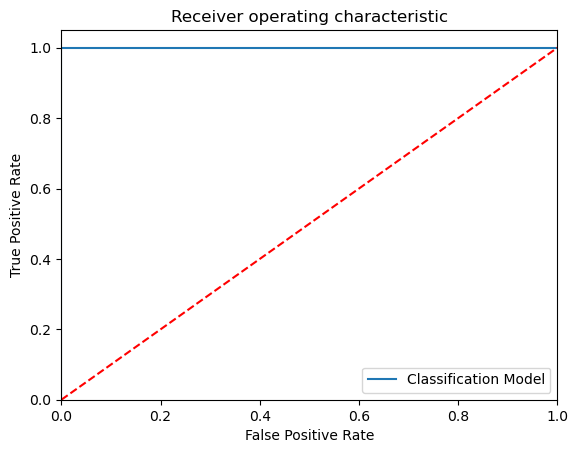

----------------------------------------------------------------------------


In [23]:
from sklearn.tree import DecisionTreeClassifier
#crate an object for model
ModelDT= DecisionTreeClassifier()
#modelLR =LogisticRegression (penality='L2',dual=false,tol=0.0001,c=1.0,fit_intercept=True,intercept_scaling=1,
#class_weight=None
ModelDT.fit(x_train,y_train)
#predict the model with the data set
y_pred=ModelDT.predict(x_test)
y_pred_prob=ModelDT.predict_proba(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual=y_test
# pred values
predicted=y_pred
matrix=confusion_matrix(actual,predicted,labels=[0,1],sample_weight=None,normalize=None)
print('confusion matrix',matrix)

tp,fn,fp,tn=confusion_matrix(actual,predicted,labels=[0,1]).reshape(-1)
print('outcome values',tp,fn,fp,tn)
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('----------------------------------------------------------------------------')

# random forest 

confusion matrix [[2565    0]
 [   0  314]]
outcome values 2565 0 0 314
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


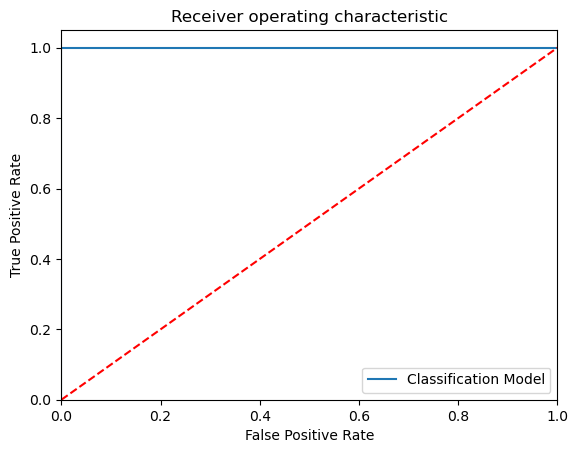

----------------------------------------------------------------------------


In [24]:
from sklearn.ensemble import RandomForestClassifier
#crate an object for model
ModelRF=RandomForestClassifier() 
#modelLR =LogisticRegression (penality='L2',dual=false,tol=0.0001,c=1.0,fit_intercept=True,intercept_scaling=1,
#class_weight=None
ModelRF.fit(x_train,y_train)
#predict the model with the data set
y_pred=ModelRF.predict(x_test)
y_pred_prob=ModelRF.predict_proba(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual=y_test
# pred values
predicted=y_pred
matrix=confusion_matrix(actual,predicted,labels=[0,1],sample_weight=None,normalize=None)
print('confusion matrix',matrix)

tp,fn,fp,tn=confusion_matrix(actual,predicted,labels=[0,1]).reshape(-1)
print('outcome values',tp,fn,fp,tn)
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('----------------------------------------------------------------------------')

# Extra trees

Confusion matrix : 
 [[ 314    0]
 [   0 2565]]
Outcome values : 
 314 0 0 2565
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


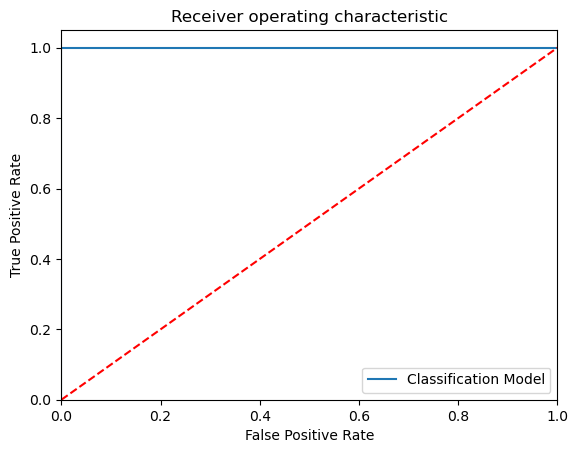

-----------------------------------------------------------------------------------------------------


In [25]:
#==Step_01=============================================================================================================>

# To build the 'Random Forest' model with random sampling

from sklearn.ensemble import ExtraTreesClassifier

# Create an object for Extra Trees Classifier 

ModelET = ExtraTreesClassifier()

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual, predicted, labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelET.predict_proba(x_test)[:,1])
plt.figure()
#--------------------------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')


    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>




# KNN algorithm

In [26]:
KNN_Results=pd.read_csv(r"C:\Users\Dlc\Downloads\KNN_Results.csv",header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 314    0]
 [   1 2564]]
Outcome values : 
 314 0 1 2564
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 100.0 %
Precision : 99.7 %
Recall : 100.0 %
F1 Score : 0.998
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 0.998
roc_auc_score: 1.0


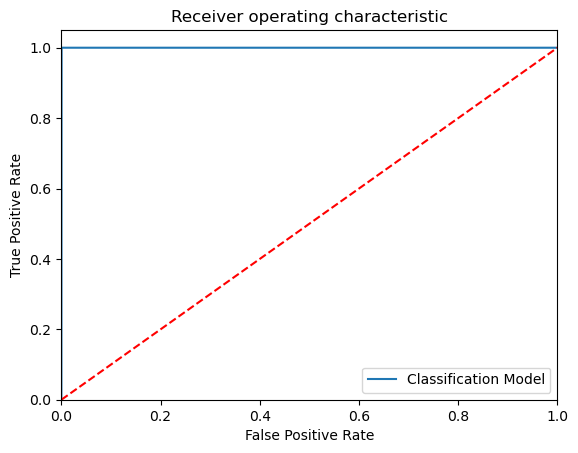

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 314    0]
 [   1 2564]]
Outcome values : 
 314 0 1 2564
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 100.0 %
Precision : 99.7 %
Recall : 100.0 %
F1 Score : 0.998
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 0.998
roc_auc_score: 1.0


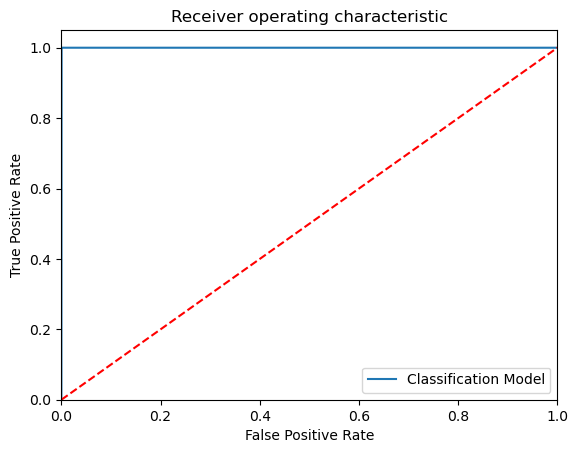

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 314    0]
 [   6 2559]]
Outcome values : 
 314 0 6 2559
Classification report : 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       0.99      1.00      0.99      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 99.8 %
Precision : 98.1 %
Recall : 100.0 %
F1 Score : 0.991
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 99.9 %
MCC : 0.989
roc_auc_score: 0.999


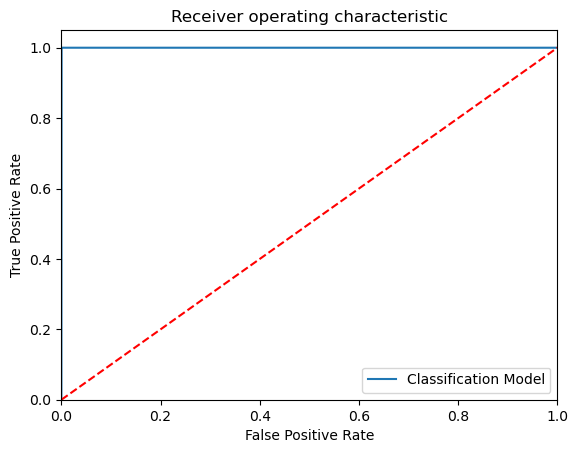

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 314    0]
 [   6 2559]]
Outcome values : 
 314 0 6 2559
Classification report : 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       0.99      1.00      0.99      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 99.8 %
Precision : 98.1 %
Recall : 100.0 %
F1 Score : 0.991
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 99.9 %
MCC : 0.989
roc_auc_score: 0.999


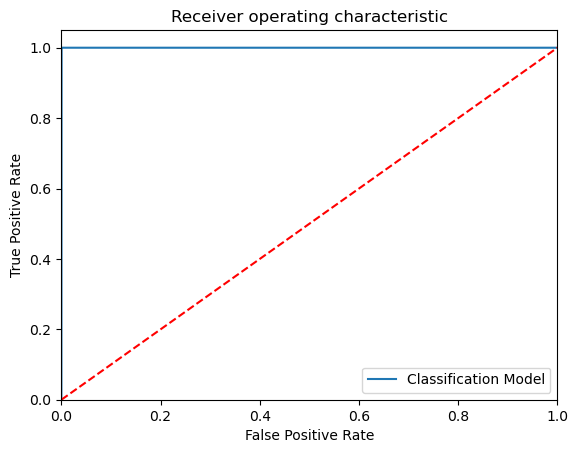

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 314    0]
 [   8 2557]]
Outcome values : 
 314 0 8 2557
Classification report : 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       0.99      1.00      0.99      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 99.7 %
Precision : 97.5 %
Recall : 100.0 %
F1 Score : 0.987
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 99.8 %
MCC : 0.986
roc_auc_score: 0.998


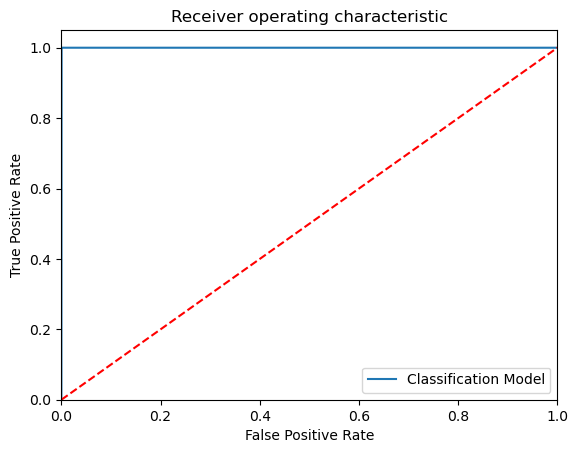

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 314    0]
 [   8 2557]]
Outcome values : 
 314 0 8 2557
Classification report : 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       0.99      1.00      0.99      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 99.7 %
Precision : 97.5 %
Recall : 100.0 %
F1 Score : 0.987
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 99.8 %
MCC : 0.986
roc_auc_score: 0.998


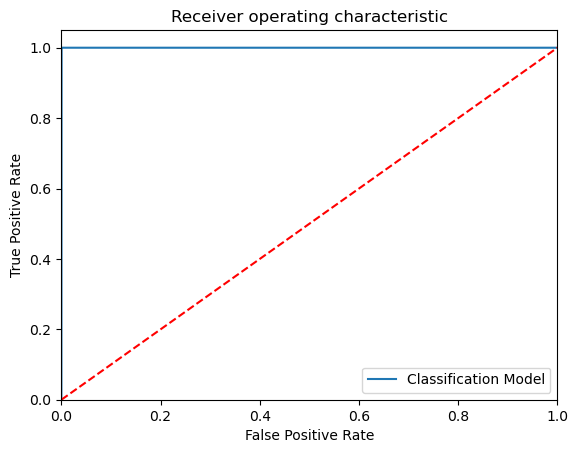

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 314    0]
 [  19 2546]]
Outcome values : 
 314 0 19 2546
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97       314
           0       1.00      0.99      1.00      2565

    accuracy                           0.99      2879
   macro avg       0.97      1.00      0.98      2879
weighted avg       0.99      0.99      0.99      2879

Accuracy : 99.3 %
Precision : 94.3 %
Recall : 100.0 %
F1 Score : 0.971
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 99.6 %
MCC : 0.967
roc_auc_score: 0.996


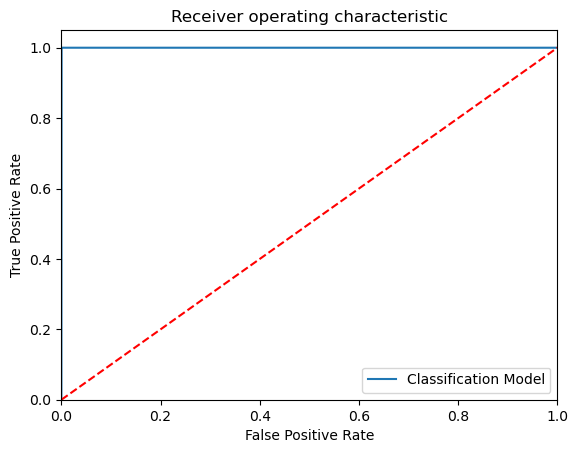

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 314    0]
 [  19 2546]]
Outcome values : 
 314 0 19 2546
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97       314
           0       1.00      0.99      1.00      2565

    accuracy                           0.99      2879
   macro avg       0.97      1.00      0.98      2879
weighted avg       0.99      0.99      0.99      2879

Accuracy : 99.3 %
Precision : 94.3 %
Recall : 100.0 %
F1 Score : 0.971
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 99.6 %
MCC : 0.967
roc_auc_score: 0.996


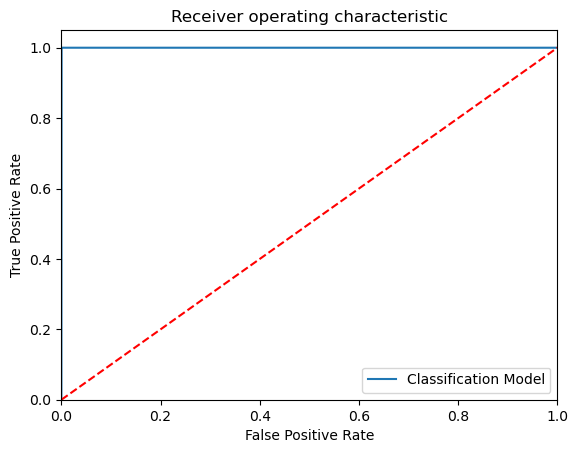

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 314    0]
 [  24 2541]]
Outcome values : 
 314 0 24 2541
Classification report : 
               precision    recall  f1-score   support

           1       0.93      1.00      0.96       314
           0       1.00      0.99      1.00      2565

    accuracy                           0.99      2879
   macro avg       0.96      1.00      0.98      2879
weighted avg       0.99      0.99      0.99      2879

Accuracy : 99.2 %
Precision : 92.9 %
Recall : 100.0 %
F1 Score : 0.963
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 99.6 %
MCC : 0.959
roc_auc_score: 0.995


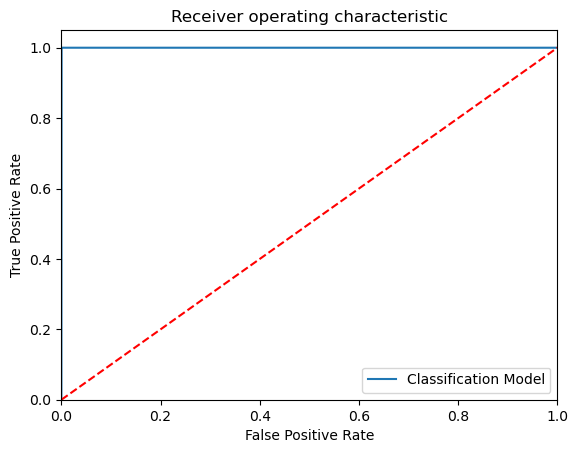

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 314    0]
 [  24 2541]]
Outcome values : 
 314 0 24 2541
Classification report : 
               precision    recall  f1-score   support

           1       0.93      1.00      0.96       314
           0       1.00      0.99      1.00      2565

    accuracy                           0.99      2879
   macro avg       0.96      1.00      0.98      2879
weighted avg       0.99      0.99      0.99      2879

Accuracy : 99.2 %
Precision : 92.9 %
Recall : 100.0 %
F1 Score : 0.963
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 99.6 %
MCC : 0.959
roc_auc_score: 0.995


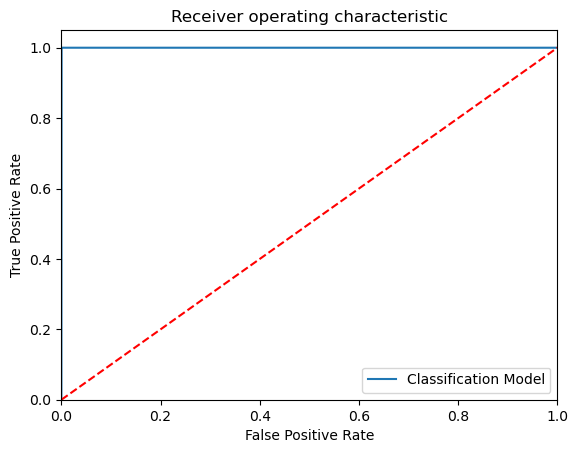

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 314    0]
 [  28 2537]]
Outcome values : 
 314 0 28 2537
Classification report : 
               precision    recall  f1-score   support

           1       0.92      1.00      0.96       314
           0       1.00      0.99      0.99      2565

    accuracy                           0.99      2879
   macro avg       0.96      0.99      0.98      2879
weighted avg       0.99      0.99      0.99      2879

Accuracy : 99.0 %
Precision : 91.8 %
Recall : 100.0 %
F1 Score : 0.957
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 99.4 %
MCC : 0.953
roc_auc_score: 0.995


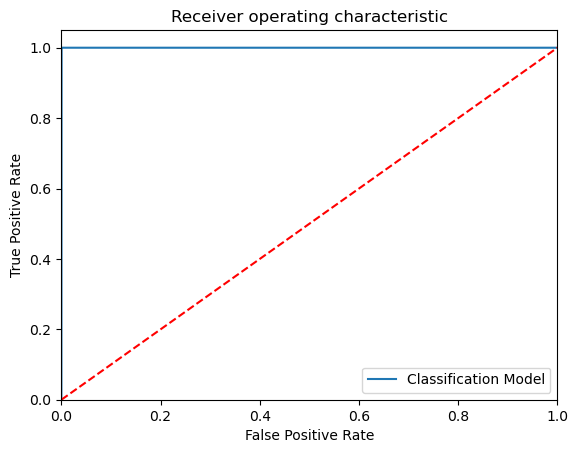

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 314    0]
 [  28 2537]]
Outcome values : 
 314 0 28 2537
Classification report : 
               precision    recall  f1-score   support

           1       0.92      1.00      0.96       314
           0       1.00      0.99      0.99      2565

    accuracy                           0.99      2879
   macro avg       0.96      0.99      0.98      2879
weighted avg       0.99      0.99      0.99      2879

Accuracy : 99.0 %
Precision : 91.8 %
Recall : 100.0 %
F1 Score : 0.957
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 99.4 %
MCC : 0.953
roc_auc_score: 0.995


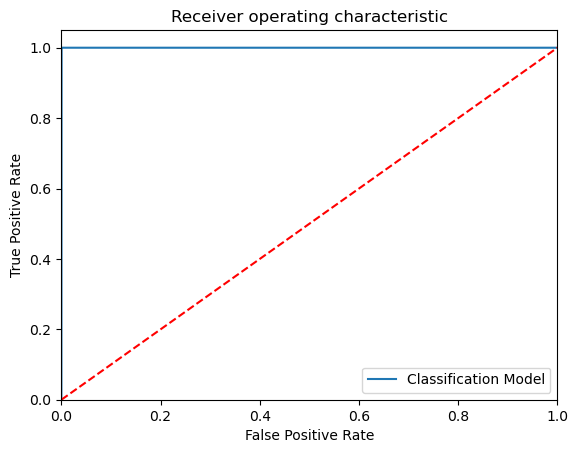

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 314    0]
 [  29 2536]]
Outcome values : 
 314 0 29 2536
Classification report : 
               precision    recall  f1-score   support

           1       0.92      1.00      0.96       314
           0       1.00      0.99      0.99      2565

    accuracy                           0.99      2879
   macro avg       0.96      0.99      0.98      2879
weighted avg       0.99      0.99      0.99      2879

Accuracy : 99.0 %
Precision : 91.5 %
Recall : 100.0 %
F1 Score : 0.956
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 99.4 %
MCC : 0.951
roc_auc_score: 0.994


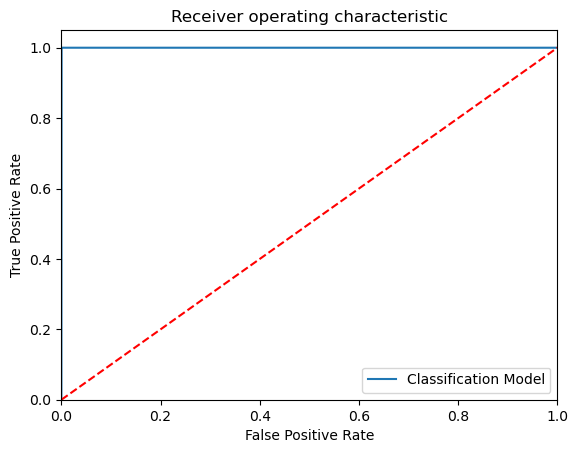

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 314    0]
 [  29 2536]]
Outcome values : 
 314 0 29 2536
Classification report : 
               precision    recall  f1-score   support

           1       0.92      1.00      0.96       314
           0       1.00      0.99      0.99      2565

    accuracy                           0.99      2879
   macro avg       0.96      0.99      0.98      2879
weighted avg       0.99      0.99      0.99      2879

Accuracy : 99.0 %
Precision : 91.5 %
Recall : 100.0 %
F1 Score : 0.956
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 99.4 %
MCC : 0.951
roc_auc_score: 0.994


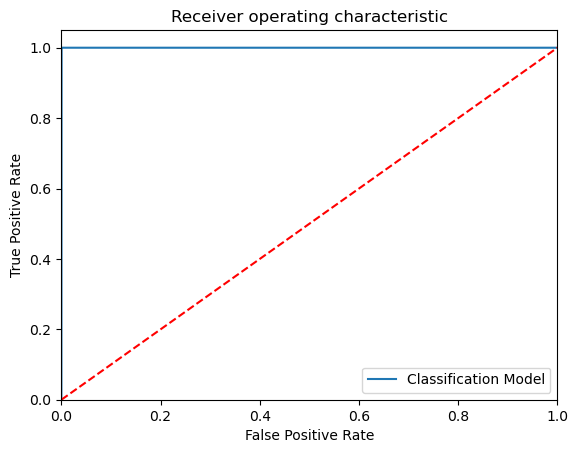

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 314    0]
 [  31 2534]]
Outcome values : 
 314 0 31 2534
Classification report : 
               precision    recall  f1-score   support

           1       0.91      1.00      0.95       314
           0       1.00      0.99      0.99      2565

    accuracy                           0.99      2879
   macro avg       0.96      0.99      0.97      2879
weighted avg       0.99      0.99      0.99      2879

Accuracy : 98.9 %
Precision : 91.0 %
Recall : 100.0 %
F1 Score : 0.953
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 99.4 %
MCC : 0.948
roc_auc_score: 0.994


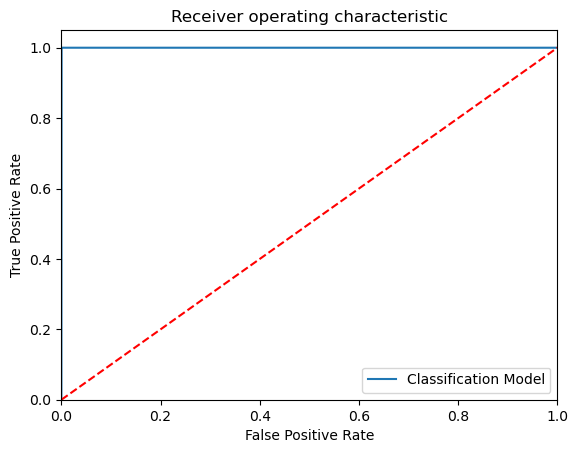

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 314    0]
 [  31 2534]]
Outcome values : 
 314 0 31 2534
Classification report : 
               precision    recall  f1-score   support

           1       0.91      1.00      0.95       314
           0       1.00      0.99      0.99      2565

    accuracy                           0.99      2879
   macro avg       0.96      0.99      0.97      2879
weighted avg       0.99      0.99      0.99      2879

Accuracy : 98.9 %
Precision : 91.0 %
Recall : 100.0 %
F1 Score : 0.953
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 99.4 %
MCC : 0.948
roc_auc_score: 0.994


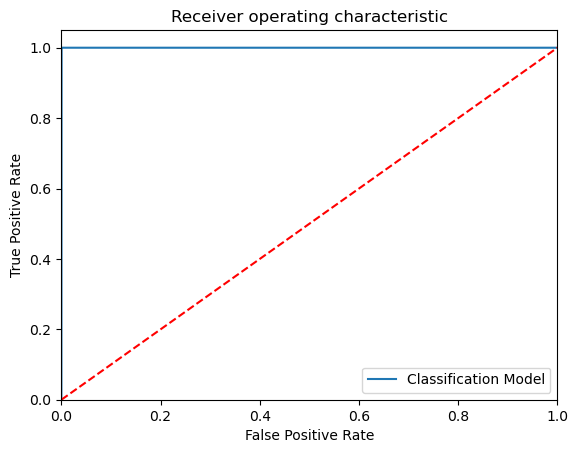

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 314    0]
 [  35 2530]]
Outcome values : 
 314 0 35 2530
Classification report : 
               precision    recall  f1-score   support

           1       0.90      1.00      0.95       314
           0       1.00      0.99      0.99      2565

    accuracy                           0.99      2879
   macro avg       0.95      0.99      0.97      2879
weighted avg       0.99      0.99      0.99      2879

Accuracy : 98.8 %
Precision : 90.0 %
Recall : 100.0 %
F1 Score : 0.947
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 99.3 %
MCC : 0.942
roc_auc_score: 0.993


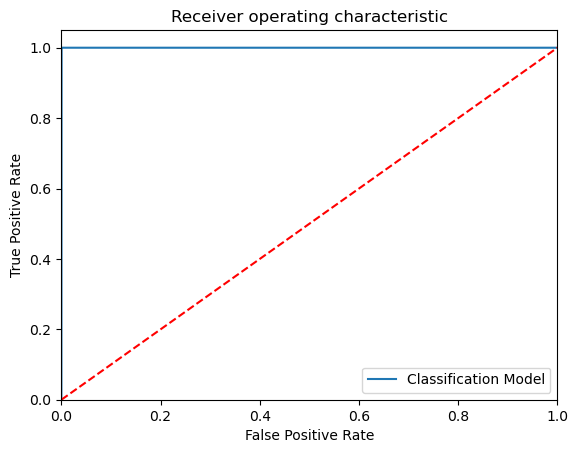

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 314    0]
 [  35 2530]]
Outcome values : 
 314 0 35 2530
Classification report : 
               precision    recall  f1-score   support

           1       0.90      1.00      0.95       314
           0       1.00      0.99      0.99      2565

    accuracy                           0.99      2879
   macro avg       0.95      0.99      0.97      2879
weighted avg       0.99      0.99      0.99      2879

Accuracy : 98.8 %
Precision : 90.0 %
Recall : 100.0 %
F1 Score : 0.947
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 99.3 %
MCC : 0.942
roc_auc_score: 0.993


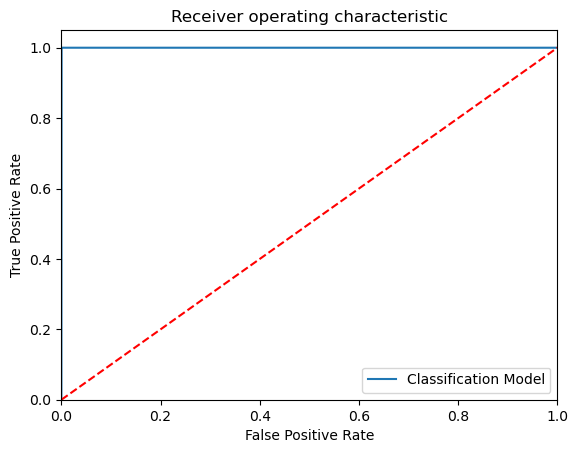

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 314    0]
 [  37 2528]]
Outcome values : 
 314 0 37 2528
Classification report : 
               precision    recall  f1-score   support

           1       0.89      1.00      0.94       314
           0       1.00      0.99      0.99      2565

    accuracy                           0.99      2879
   macro avg       0.95      0.99      0.97      2879
weighted avg       0.99      0.99      0.99      2879

Accuracy : 98.7 %
Precision : 89.5 %
Recall : 100.0 %
F1 Score : 0.944
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 99.3 %
MCC : 0.939
roc_auc_score: 0.993


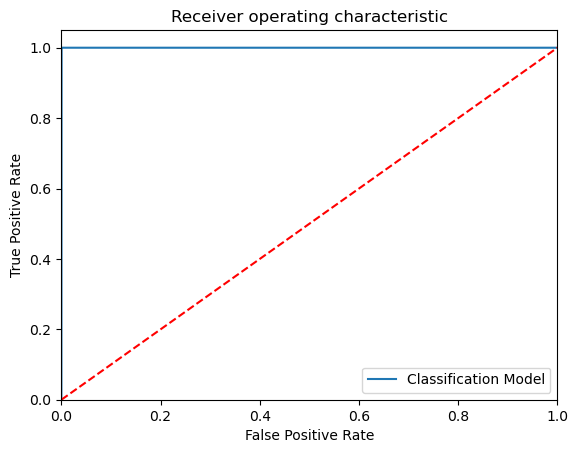

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 314    0]
 [  37 2528]]
Outcome values : 
 314 0 37 2528
Classification report : 
               precision    recall  f1-score   support

           1       0.89      1.00      0.94       314
           0       1.00      0.99      0.99      2565

    accuracy                           0.99      2879
   macro avg       0.95      0.99      0.97      2879
weighted avg       0.99      0.99      0.99      2879

Accuracy : 98.7 %
Precision : 89.5 %
Recall : 100.0 %
F1 Score : 0.944
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 99.3 %
MCC : 0.939
roc_auc_score: 0.993


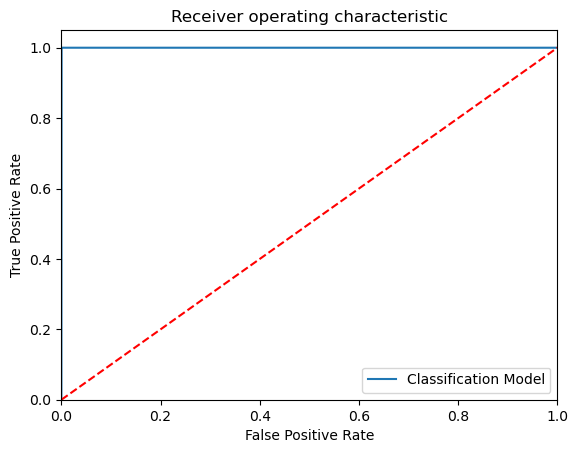

In [27]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [28]:
KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,314,0,1,2564,1.000,0.997,1.0,0.998,1.000,0.998,0.999805,1.000
1,KNeighborsClassifier(n_neighbors=2),2,314,0,1,2564,1.000,0.997,1.0,0.998,1.000,0.998,0.999805,1.000
2,KNeighborsClassifier(n_neighbors=3),3,314,0,6,2559,0.998,0.981,1.0,0.991,0.998,0.989,0.998830,0.999
3,KNeighborsClassifier(n_neighbors=4),4,314,0,6,2559,0.998,0.981,1.0,0.991,0.998,0.989,0.998830,0.999
4,KNeighborsClassifier(),5,314,0,8,2557,0.997,0.975,1.0,0.987,0.997,0.986,0.998441,0.998
5,KNeighborsClassifier(n_neighbors=6),6,314,0,8,2557,0.997,0.975,1.0,0.987,0.997,0.986,0.998441,0.998
6,KNeighborsClassifier(n_neighbors=7),7,314,0,19,2546,0.993,0.943,1.0,0.971,0.993,0.967,0.996296,0.996
7,KNeighborsClassifier(n_neighbors=8),8,314,0,19,2546,0.993,0.943,1.0,0.971,0.993,0.967,0.996296,0.996
8,KNeighborsClassifier(n_neighbors=9),9,314,0,24,2541,0.992,0.929,1.0,0.963,0.991,0.959,0.995322,0.996
9,KNeighborsClassifier(n_neighbors=10),10,314,0,24,2541,0.992,0.929,1.0,0.963,0.991,0.959,0.995322,0.996


# Navie algorithm

Confusion matrix : 
 [[ 245   69]
 [  12 2553]]
Outcome values : 
 245 69 12 2553
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.78      0.86       314
           0       0.97      1.00      0.98      2565

    accuracy                           0.97      2879
   macro avg       0.96      0.89      0.92      2879
weighted avg       0.97      0.97      0.97      2879

Accuracy : 97.2 %
Precision : 95.3 %
Recall : 78.0 %
F1 Score : 0.858
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 88.8 %
MCC : 0.848
roc_auc_score: 0.888


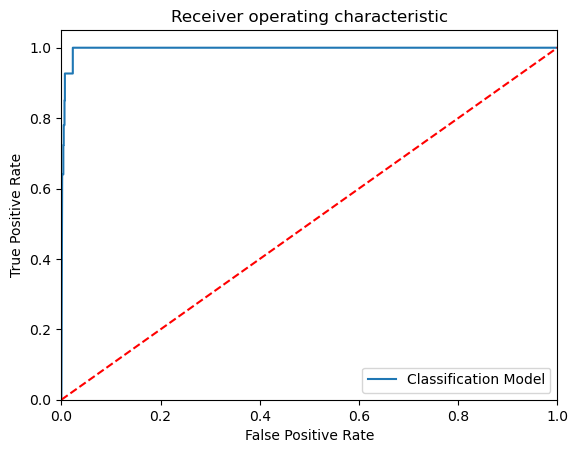

-----------------------------------------------------------------------------------------------------


In [29]:
# Training the Naive Bayes model (GaussianNB) on the Training set

from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

# Fit the model with train data

modelGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelGNB.predict(x_test)
y_pred_prob = modelGNB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,modelGNB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')

In [30]:
EMResults=pd.read_csv(r"C:\Users\Dlc\Downloads\EMResults.csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVC algorithm

Model Name:  SVM - Linear
Confusion matrix : 
 [[ 184  130]
 [   0 2565]]
Outcome values : 
 184 130 0 2565
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.59      0.74       314
           0       0.95      1.00      0.98      2565

    accuracy                           0.95      2879
   macro avg       0.98      0.79      0.86      2879
weighted avg       0.96      0.95      0.95      2879

Accuracy : 95.5 %
Precision : 100.0 %
Recall : 58.6 %
F1 Score : 0.739
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 79.3 %
MCC : 0.747
roc_auc_score: 0.793


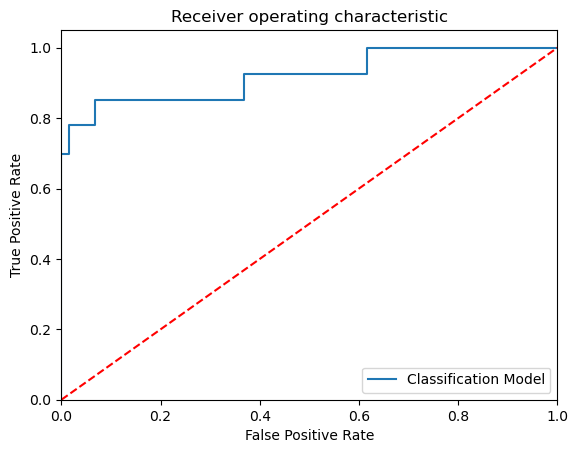

-----------------------------------------------------------------------------------------------------


In [31]:
from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#---------------------------------------------------------------

In [43]:
EMResults_1=pd.read_csv(r"C:\Users\Dlc\Downloads\EMResults.csv",header=0)
EMResults_1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Classification algorithm comparison

Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 314    0]
 [  12 2553]]
Outcome values : 
 314 0 12 2553
Classification report : 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       0.98      1.00      0.99      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 99.6 %
Precision : 96.3 %
Recall : 100.0 %
F1 Score : 0.981
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 99.8 %
MCC : 0.979
roc_auc_score: 0.998


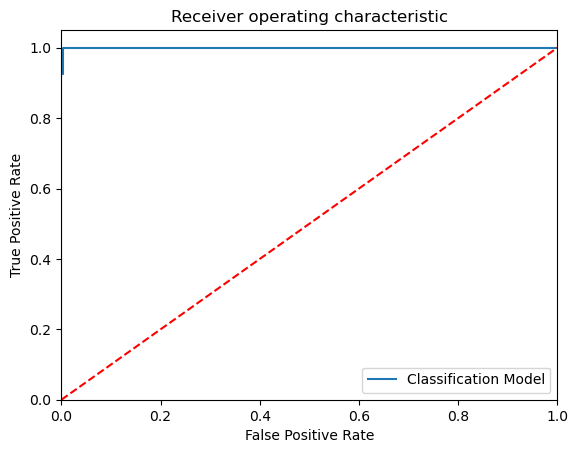

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 314    0]
 [   2 2563]]
Outcome values : 
 314 0 2 2563
Classification report : 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 99.9 %
Precision : 99.4 %
Recall : 100.0 %
F1 Score : 0.997
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 100.0 %
MCC : 0.996
roc_auc_score: 1.0


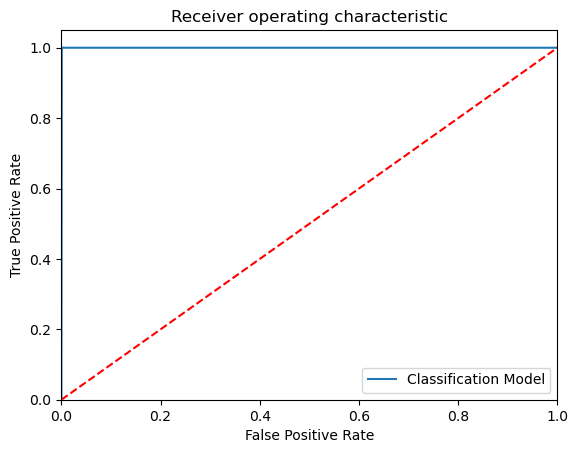

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 314    0]
 [   0 2565]]
Outcome values : 
 314 0 0 2565
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


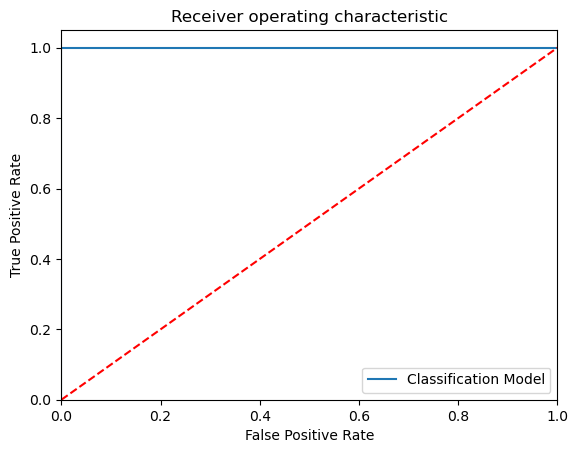

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 314    0]
 [   0 2565]]
Outcome values : 
 314 0 0 2565
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


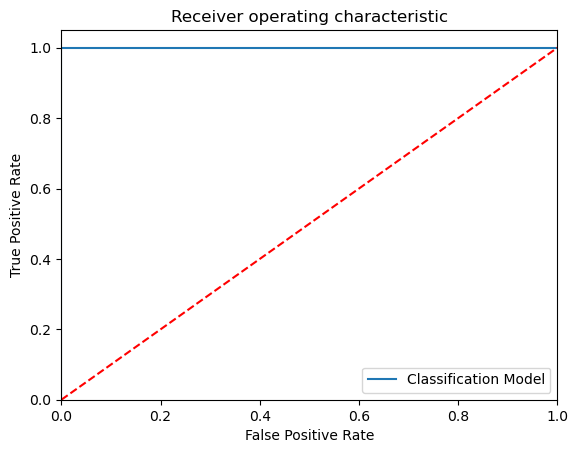

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 314    0]
 [   8 2557]]
Outcome values : 
 314 0 8 2557
Classification report : 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       314
           0       1.00      1.00      1.00      2565

    accuracy                           1.00      2879
   macro avg       0.99      1.00      0.99      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 99.7 %
Precision : 97.5 %
Recall : 100.0 %
F1 Score : 0.987
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 99.8 %
MCC : 0.986
roc_auc_score: 0.998


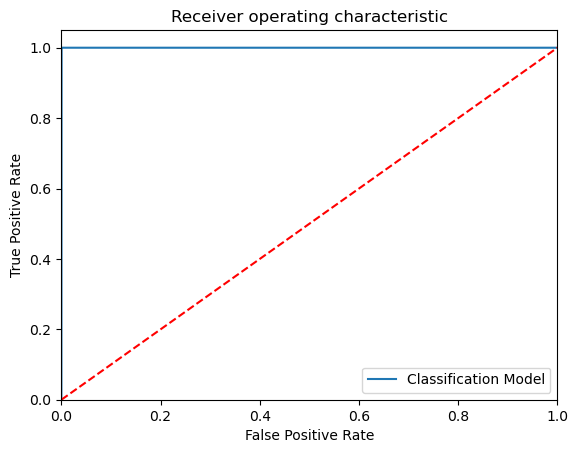

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 245   69]
 [  12 2553]]
Outcome values : 
 245 69 12 2553
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.78      0.86       314
           0       0.97      1.00      0.98      2565

    accuracy                           0.97      2879
   macro avg       0.96      0.89      0.92      2879
weighted avg       0.97      0.97      0.97      2879

Accuracy : 97.2 %
Precision : 95.3 %
Recall : 78.0 %
F1 Score : 0.858
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 88.8 %
MCC : 0.848
roc_auc_score: 0.888


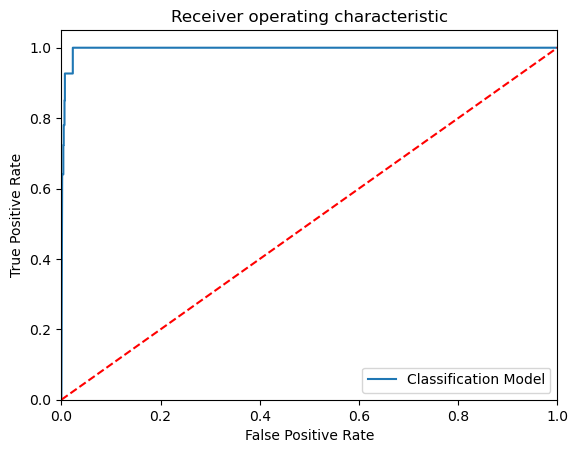

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[   0  314]
 [   0 2565]]
Outcome values : 
 0 314 0 2565
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       314
           0       0.89      1.00      0.94      2565

    accuracy                           0.89      2879
   macro avg       0.45      0.50      0.47      2879
weighted avg       0.79      0.89      0.84      2879

Accuracy : 89.1 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


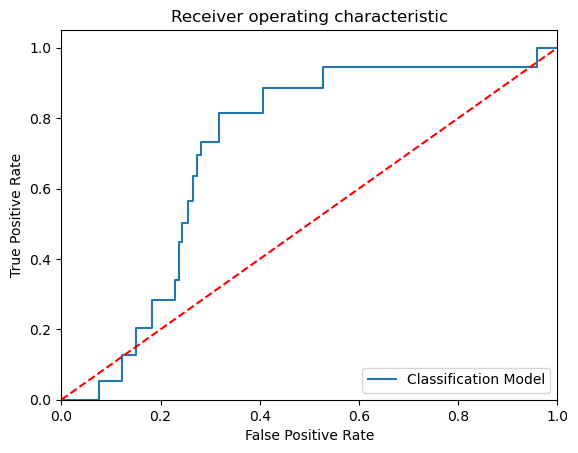

-----------------------------------------------------------------------------------------------------


In [44]:

#==Step_02=============================================================================================================>

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults_1 =EMResults_1.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>


In [47]:
#predicting using the random forest

y_predRF = ModelRF.predict(x_test)

In [48]:
#displaying result set

EMResults_1

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),314,0,12,2553,0.996,0.963,1.00,0.981,0.995,0.979,0.997661,0.998
1,DecisionTreeClassifier(),314,0,2,2563,0.999,0.994,1.00,0.997,0.999,0.996,0.999610,1.000
2,"(DecisionTreeClassifier(max_features='auto', r...",314,0,0,2565,1.000,1.000,1.00,1.000,1.000,1.000,1.000000,1.000
3,"(ExtraTreeClassifier(random_state=1337961201),...",314,0,0,2565,1.000,1.000,1.00,1.000,1.000,1.000,1.000000,1.000
4,KNeighborsClassifier(),314,0,8,2557,0.997,0.975,1.00,0.987,0.997,0.986,0.998441,0.998
5,GaussianNB(),245,69,12,2553,0.972,0.953,0.78,0.858,0.995,0.848,0.887788,0.888
6,SVC(probability=True),0,314,0,2565,0.891,NaN,0.00,0.000,1.000,NaN,0.500000,0.500


In [50]:
Results = pd.DataFrame({'Class_A':y_test, 'Class_P':y_predRF})


# Merge two Dataframes on index of both the dataframes

ResultsFinal = CFData_bk.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Class_A,Class_P
1061,805.0,-0.348790,0.942648,0.772145,-0.102838,0.041928,0.162930,-0.015540,0.514974,-0.372851,-0.692771,-1.057227,0.373935,1.149490,0.116000,1.058722,0.373912,-0.406771,-0.206071,-0.292826,-0.127511,0.135842,0.352569,-0.050041,-0.723942,-0.367983,0.319538,-0.066893,-0.030732,8.90,0,0,0
3649,3120.0,1.248387,-0.091206,0.303811,-0.104753,-0.526679,-0.707099,-0.163463,-0.041177,0.399964,-0.206574,-0.169019,-0.240756,-0.925812,0.465589,1.499286,0.011357,0.032397,-0.822384,-0.281581,-0.158507,-0.091895,-0.269220,0.084743,0.119461,0.132489,0.992821,-0.074608,-0.001264,6.07,0,0,0
6964,9050.0,-2.356681,-1.857457,2.409593,-0.156934,2.600511,-1.684472,-0.956067,-0.039852,1.572553,-1.136206,0.484288,-1.671725,2.435006,0.796973,-1.315277,-0.751878,0.898329,-0.865539,-0.510093,0.624758,-0.028445,-0.152321,0.085892,0.134339,0.460731,0.997482,-0.303380,-0.140282,3.60,0,0,0
300,217.0,-2.421230,-1.369602,2.261281,2.011034,1.878525,-1.275607,-1.251029,0.212619,0.142608,0.000982,-0.504586,-0.032402,-0.977309,0.028346,0.462211,-1.193537,0.863242,-0.606631,0.800709,-0.411785,-0.089577,0.157737,-0.624865,0.487156,0.270894,-0.093370,0.330056,-0.056340,24.00,0,0,0
8242,11060.0,1.246931,0.041076,0.882831,0.319926,-0.781588,-0.820742,-0.399400,-0.233426,1.653013,-0.536361,0.735897,-2.074221,2.340938,1.365334,0.519777,0.461401,0.262864,0.087879,-0.407123,-0.045428,-0.060189,0.113802,-0.021561,0.430250,0.225686,1.028817,-0.085877,0.007115,15.95,0,0,0
